## How to simulate extra-tidal stars and binaries of globular clusters with Corespray.

#### STEP 0: Import the necessary Python packages. 

$\texttt{corespray}$ can be downloaded at: https://github.com/webbjj/corespray. \
$\texttt{galpy}$ (Bovy 2015) can be downloaded at: https://docs.galpy.org/en/v1.8.0/. \
$\texttt{clustertools}$ can be downloaded at: https://clustertools.readthedocs.io/en/latest/.

In [72]:
# Import corespray:
from corespray import corespraydf

# Import galpy packages:
from galpy.potential import MWPotential2014
from galpy.potential import KingPotential
from galpy.util import conversion
from galpy.orbit import Orbit

# Import clustertools:
import clustertools

# Import other necessary Python packages:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
from matplotlib import animation

#### STEP 1: Load in the specific parameters for your GC of interest:
Spatial, kinematic and orbital parameters for most Galactic GCs can be found in the Baumgardt & Hilker (2018) catalogue. This catalogue is accessible at: https://people.smp.uq.edu.au/HolgerBaumgardt/globular/. For this example, we simulate extra-tidal stars and binaries of M3. 

In [13]:
gcname ='M3' # GC name
mu0 = 0.  # Average 1D velocity in the core [km/s]
sig0 = 7.6  # Central 1D velocity dispersion [km/s]
vesc0 = 30.0  # Central escape velocity [km/s]
logrho0 = 3.67  # Log of central density [Msol / pc^3]
rho0 = 10.0**3.67  # Core density [Msol / pc^3]
mgc = 4.06e5  # Mass [solar masses]
rgc = 127.28  # Tidal radius of GC, assuming King potential [pc]
rcore = 1.23  # Core radius of GC [pc]
#W0 = clustertools.c_to_w0(np.log(rgc/rcore))
W0 = 8.61469762517307

mmin = 0.1 # Minimum stellar mass in core [Msol]
mmax = 1.4 # Maximum stellar mass in the core [Msol]
alpha = -1.35 # Stellar mass function in the core slope (Salpeter 1955)

potential = MWPotential2014  # Galactic potential model

#### STEP 2: Initialize the orbit using your previously defined parameters:

In [12]:
cspray_init = corespraydf(gcname, potential, mu0, sig0, vesc0, rho0, mgc, rgc, W0, mmin, mmax, alpha)
p_orb = 10  # Myr (you can update this orbital period by integrating Corespray again)
os_init = cspray_init.sample(p_orb, nstar=10, binaries=True)

#### STEP 3: Integrate the orbit:

In [14]:
ts = np.linspace(0,10,1000)  # integration times
os_init.integrate(ts, potential)  # can choose which Galactic potential to use (e.g. MWPotenial2014)

#### STEP 4: Determine the maximum orbital period of the GC. Then, integrate orbit again using that orbital period:

In [15]:
# Find the maximum orbital period of the GC:
p_orb_rad = cspray_init.o.Tr()
p_orb_phi = cspray_init.o.Tp()
p_orb_max = max(np.array([p_orb_rad, p_orb_phi]))
print("The maximum orbital period of M3 is {} Gyr.".format(p_orb_max))

# Integrate the orbit using the newly computed P_orb:
cspray = corespraydf(gcname, potential, mu0, sig0, vesc0, rho0, mgc, rgc, W0, mmin, mmax, alpha)
p_orb = p_orb_max * 1000  # Myr 
os = cspray.sample(p_orb, nstar=10, binaries=True)
os.integrate(ts, potential)

The maximum orbital period of M3 is 0.3878209164099942 Gyr.


#### STEP 5: Extract parameters for the SINGLE escapers:

In [38]:
ra = os.ra()  # [deg]
dec = os.dec()  # [deg]
dist = os.dist()  # [kpc]
pmra = os.pmra()  # [mas/yr]
pmdec = os.pmdec() # [mas/yr]
vr = os.vlos()  # [km/s]
r = os.R()  # [kpc]
z = os.z()  # [kpc]
t_esc = cspray.tesc  # [Myr] in the past
v_esc = cspray.vesc  # [km/s]
mstar = cspray.mstar # [Msol]

#### STEP 6: Extract parameters for all BINARY stars:

In [53]:
ra_b = cspray.obf.ra()  # [deg]
dec_b = cspray.obf.dec()  # [deg]
dist_b = cspray.obf.dist()  # [kpc]
pmra_b = cspray.obf.pmra()  # [mas/yr]
pmdec_b = cspray.obf.pmdec()  # [mas/yr]
vr_b = cspray.obf.vlos()  # [km/s]
r_b = cspray.obf.R()  # [kpc]
z_b = cspray.obf.z()  # [kpc]
# Would tesc of binary be same as escaper star?
v_esc_b = cspray.vescb  # [km/s]
m_b1 = cspray.mb1  # [Msol]
m_b2 = cspray.mb2  # [Msol]
m_b_tot = m_b1 + m_b2  # [Msol]

# bindx is a boolean that gives indxs of binaries that escaped the cluster: 
bin_esc = cspray.bindx
print("{}/{} binaries escaped {}.".format(len(ra_b[bin_esc]), len(ra_b), gcname))

2/10 binaries escaped M3.


#### STEP 7: Extract parameters for GC of interest:

In [ ]:
ra_b = cspray.obf.ra()  # [deg]
dec_b = cspray.obf.dec()  # [deg]
dist_b = cspray.obf.dist()  # [kpc]
pmra_b = cspray.obf.pmra()  # [mas/yr]
pmdec_b = cspray.obf.pmdec()  # [mas/yr]
vr_b = cspray.obf.vlos()  # [km/s]
r_b = cspray.obf.R()  # [kpc]
z_b = cspray.obf.z()  # [kpc]
# Would tesc of binary be same as escaper star?
v_esc_b = cspray.vescb  # [km/s]
m_b1 = cspray.mb1  # [Msol]
m_b2 = cspray.mb2  # [Msol]
m_b_tot = m_b1 + m_b2  # [Msol]

# bindx is a boolean that gives indices of binaries that escaped the cluster: 
bin_esc = cspray.bindx
print("{}/{} binaries escaped {}.".format(len(ra_b[bin_esc]), len(ra_b), gcname))

#### Explore some parameter spaces of your simulated extra-tidal stars and binaries!

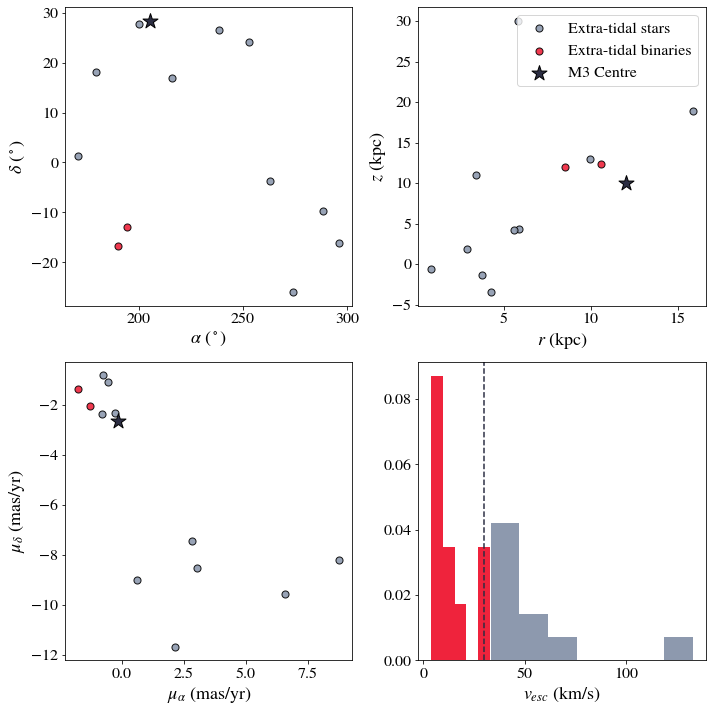

In [100]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# RA vs Dec positions:
ax[0, 0].scatter(ra, dec, marker='o', s=50, edgecolor='black', c='#8d99ae', alpha=0.9) 
ax[0, 0].scatter(ra_b[bin_esc], dec_b[bin_esc], marker='o', s=50, edgecolor='black', c='#ef233c', alpha=0.9) 
ax[0, 0].scatter(cspray.o.ra(), cspray.o.dec(), marker='*', s=250, edgecolor='black', c='#2b2d42')
ax[0, 0].set_xlabel(r"$\alpha$ ($^\circ $)", fontsize=18)
ax[0, 0].set_ylabel(r"$\delta$ ($^\circ $)", fontsize=18)
ax[0, 0].tick_params(axis='both', which='major', labelsize=16)
ax[0, 0].tick_params(axis='both', which='minor', labelsize=16)

# R vs z positions:
ax[0, 1].scatter(r, z, marker='o', s=50, edgecolor='black', c='#8d99ae', alpha=0.9, label='Extra-tidal stars') 
ax[0, 1].scatter(r_b[bin_esc], z_b[bin_esc], marker='o', s=50, edgecolor='black', c='#ef233c', alpha=0.9, label='Extra-tidal binaries') 
ax[0, 1].scatter(cspray.o.r(), cspray.o.z(), marker='*', s=250, edgecolor='black', c='#2b2d42', label='M3 Centre')
ax[0, 1].set_xlabel(r"$r$ (kpc)", fontsize=18)
ax[0, 1].set_ylabel(r"$z$ (kpc)", fontsize=18)
ax[0, 1].tick_params(axis='both', which='major', labelsize=16)
ax[0, 1].tick_params(axis='both', which='minor', labelsize=16)
ax[0, 1].legend(fontsize=16)

# Proper motion:
ax[1, 0].scatter(pmra, pmdec, marker='o', s=50, edgecolor='black', c='#8d99ae', alpha=0.9) 
ax[1, 0].scatter(pmra_b[bin_esc], pmdec_b[bin_esc], marker='o', s=50, edgecolor='black', c='#ef233c', alpha=0.9) 
ax[1, 0].scatter(cspray.o.pmra(), cspray.o.pmdec(), marker='*', s=250, edgecolor='black', c='#2b2d42')
ax[1, 0].set_xlabel(r"$\mu_{\alpha}$ (mas/yr)", fontsize=18)
ax[1, 0].set_ylabel(r"$\mu_{\delta}$ (mas/yr)", fontsize=18)
ax[1, 0].tick_params(axis='both', which='major', labelsize=16)
ax[1, 0].tick_params(axis='both', which='minor', labelsize=16)

# Escape velocities:
ax[1, 1].hist(v_esc, bins=7, color='#8d99ae', density=True)
ax[1, 1].hist(v_esc_b, bins=5, color='#ef233c', density=True)
ax[1, 1].axvline(vesc0, ls='--', c='#2b2d42')
ax[1, 1].tick_params(axis='both', which='major', labelsize=16)
ax[1, 1].tick_params(axis='both', which='minor', labelsize=16)
ax[1, 1].set_xlabel(r"$v_{esc}$ (km/s)", fontsize=18)

fig.tight_layout()
plt.show()